# MA plot (64-cell, np)

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [3]:
stage = '64'
diff_gene_dict = {}
diff_gene_ls_dict = {}

In [4]:
diff_gene_dict[stage] = {}

In [5]:
diff_gene_ls_dict[stage] = {}

In [6]:
for gene in ['npm2a'] :
    diff_gene_dict[stage][gene] = pd.read_table(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/diff_byTrans/WT_VS_{gene}_{stage}_ensGene.diff',
                                                   comment = '#', header = None, sep = '\t'
                                                  )
    diff_gene_dict[stage][gene].columns = ['GeneSymbol','GeneName','GFOLD(0.01)','E-FDR','log2fdc','1stRPKM','2ndRPKM']
    diff_gene_dict[stage][gene] = diff_gene_dict[stage][gene].loc[(diff_gene_dict[stage][gene]['1stRPKM'] > 0.58) | (diff_gene_dict[stage][gene]['2ndRPKM'] > 0)]
    print(diff_gene_dict[stage][gene].shape[0])
    diff_gene_ls_dict[stage][gene] = {}
    diff_gene_ls_dict[stage][gene]['up'] = diff_gene_dict[stage][gene].loc[diff_gene_dict[stage][gene]['GFOLD(0.01)'] > 0.58]['GeneSymbol'].str.split(".", expand = True)[0].tolist()
    diff_gene_ls_dict[stage][gene]['down'] = diff_gene_dict[stage][gene].loc[diff_gene_dict[stage][gene]['GFOLD(0.01)'] < -0.58]['GeneSymbol'].str.split(".", expand = True)[0].tolist()
    print(len(diff_gene_ls_dict[stage][gene]['up']), len(diff_gene_ls_dict[stage][gene]['down']))

36648
287 303


In [7]:
diff_gene_dict['64']['npm2a']

,GeneSymbol,GeneName,GFOLD(0.01),E-FDR,log2fdc,1stRPKM,2ndRPKM
0,ENSDART00000000004.5,ENSDARG00000000001.6,0.0,1,-0.354229,8.315090,5.063620
1,ENSDART00000000005.7,ENSDARG00000000002.8,0.0,1,0.465057,0.146997,0.191313
2,ENSDART00000000042.11,ENSDARG00000033231.9,0.0,1,-0.170374,104.495000,79.075700
3,ENSDART00000000069.8,ENSDARG00000000068.9,0.0,1,-0.084067,47.918300,40.146800
4,ENSDART00000000070.7,ENSDARG00000000069.7,0.0,1,-0.791185,90.952100,44.683600
...,...,...,...,...,...,...,...
65823,ENSDART00000194986.1,ENSDARG00000117236.1,0.0,1,0.001066,10.230100,8.741310
65826,ENSDART00000194989.1,ENSDARG00000117421.1,0.0,1,-1.706490,0.201041,0.027134
65827,ENSDART00000194990.1,ENSDARG00000117341.1,0.0,1,-1.047980,0.026023,0.011708
65828,ENSDART00000194991.1,ENSDARG00000117335.1,0.0,1,-1.529130,0.500821,0.174558


In [8]:
import os
danRer11_2_transcript_to_gene = {}

with open(os.path.expanduser('~wangwen/source/bySpecies/danRer11_2/danRer11_2.ensGene.genePredExt')) as fhd:
    for line in fhd:
        line = line.strip().split()
        danRer11_2_transcript_to_gene[line[0]]= line[11]

list(danRer11_2_transcript_to_gene.items())[:5]

[('ENSDART00000164359.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000158290.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000157701.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000167898.1', 'ENSDARG00000099104.1'),
 ('ENSDART00000166393.1', 'ENSDARG00000102407.2')]

### nature 2013

In [9]:
nature_2013_genes = pd.read_csv(
    '/mnt/Storage/home/wangwen/project/fitCR/source/nature_2013_nature12632/41586_2013_BFnature12632_MOESM30_ESM.txt',
    skiprows=23,sep='\t')
nature_2013_genes.head()

,Gene_id,Symbol,Description,Adult_tissue_count,Meta_gene,Maternal_contr,Exon_length,Masked_intron_length,WT4_exon_rpkm,WT4_intron_rpkm,...,NS4_down,P4_down,PN4_down,PS4_down,PNS4_down,N6_down,NS6_down,P6_down,PS6_down,PNS6_down
0,ENSDARG00000000001,slc35a5,"solute carrier family 35, member A5",NaN,.,M,2478,4255,8.914,1.404,...,.,.,.,.,.,.,.,.,.,.
1,ENSDARG00000000002,ccdc80,coiled-coil domain containing 80,NaN,.,Z,3175,12250,0.232,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSDARG00000000018,nrf1,nuclear respiratory factor 1,8.0,.,M,3074,13354,77.050,0.196,...,.,.,.,.,.,X,X,.,.,X
3,ENSDARG00000000019,ube2h,ubiquitin-conjugating enzyme E2H (UBC8 homolog...,8.0,.,M,3659,27485,37.676,0.217,...,.,.,.,.,.,X,X,.,.,X
4,ENSDARG00000000068,slc9a3r1,solute carrier family 9 (sodium/hydrogen excha...,8.0,.,M,2458,25261,31.587,0.003,...,.,.,.,.,.,.,.,.,.,.


In [10]:
first_wave_genes = set()
for index, row in nature_2013_genes.iterrows():
    if row['First_wave_5rpkm'] == 'X':
        first_wave_genes.add(row['Gene_id'])
print(len(first_wave_genes))


269


In [11]:
first_wave_genes_danRer11_2 = first_wave_genes & set(
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])
print(len(first_wave_genes_danRer11_2))


196


### earlyZGA genes (cell rep 2014)

In [12]:
import os
earlyGA_genes = set(pd.read_csv(os.path.expanduser('/mnt/Storage/home/wangwen/project/fitCR/source/cellrep2014_4sUTP/genelist.txt'),header=None)[0])
earlyGA_genes_danRer11_2 =  earlyGA_genes & set(
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])
print(len(earlyGA_genes_danRer11_2))


342


### zygotic specific

In [13]:
zygotic_specific=set()
with open(os.path.expanduser('/mnt/Storage/home/wangwen/project/zebrafish_allelic/source/dev_095091_zygote_specific_gene.txt')) as fhd:
    for line in fhd:
        zygotic_specific.add(line.strip())
zygotic_specific_danRer11_2 = zygotic_specific & set(	
    [x.split('.')[0] for x in danRer11_2_transcript_to_gene.values()])

In [14]:
gene_ZGA = first_wave_genes_danRer11_2 | earlyGA_genes_danRer11_2 | zygotic_specific_danRer11_2
print(len(gene_ZGA))

603


In [16]:
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")

tr_gene_symbol_pd.head()

,transcript_id,gene_id,gene_symbol
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97


In [17]:
trans_ZGA = tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_id'].str.split('.', expand = True)[0].isin(gene_ZGA)]['transcript_id'].str.split('.', expand = True)[0].tolist()
print(trans_ZGA[:5])

['ENSDART00000018741', 'ENSDART00000160221', 'ENSDART00000152573', 'ENSDART00000152426', 'ENSDART00000152132']


!!!  GFOLD得到的log2fdc不同于np.log2(df['2ndRPKM']) - np.log2(df['1stRPKM'])  
 Because RPKM is acturally using sequencing depth as the normalization constant, log2 fold change based on RPKM could be different from the log2fdc field.

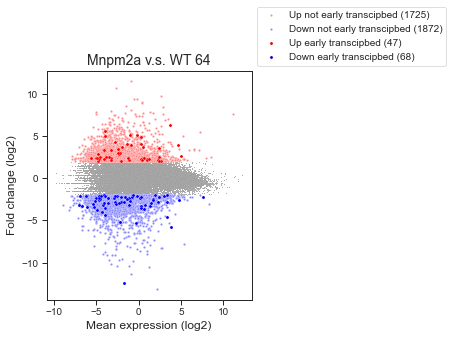

In [37]:
#### log2(2rpkm) - log2(1rpkm) as Y

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for gene in ['npm2a'] :
        fig, ax = plt.subplots(figsize=(6.4, 4.8), tight_layout = True)
        df = diff_gene_dict[stage][gene].copy()
        df = df.loc[(df['1stRPKM'] != 0) & (df['2ndRPKM'] != 0)]
        A = (np.log2(df['1stRPKM']) + np.log2(df['2ndRPKM']))/2
        M = np.log2(df['2ndRPKM']) - np.log2(df['1stRPKM'])
        sns.scatterplot(
            x=A,
            y=M,
            s=1,
            ax = ax,
            color = 'grey'
        )
        ax.set_title(f"M{gene} v.s. WT {stage}")
        ax.set_xlabel("Mean expression (log2)")
        ax.set_ylabel("Fold change (log2)")
        
        # deg_pos non-ZGA
        deg_pos = df[(M > 2) & ~df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]
        deg_posA = (np.log2(deg_pos['1stRPKM']) + np.log2(deg_pos['2ndRPKM']))/2
        deg_posM = np.log2(deg_pos['2ndRPKM']) - np.log2(deg_pos['1stRPKM'])
        sns.scatterplot(
            x=deg_posA,
            y=deg_posM,
            s=5,
            color="#FF8888",
            label=f"Up not early transcipbed ({deg_pos.shape[0]})",
            ax = ax
        ) # s is point size
        
        # deg_neg non-ZGA
        deg_neg = df[(M < -2) & ~df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]
        deg_negA = (np.log2(deg_neg['1stRPKM']) + np.log2(deg_neg['2ndRPKM']))/2
        deg_negM = np.log2(deg_neg['2ndRPKM']) - np.log2(deg_neg['1stRPKM'])
        sns.scatterplot(
            x=deg_negA,
            y=deg_negM,
            s=5,
            color="#8888FF",
            label=f"Down not early transcipbed ({deg_neg.shape[0]})",
            ax = ax
        ) # s is point size

        
        # deg_pos ZGA
        deg_pos_ZGA = df[(M > 2) & df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]
        deg_posA_ZGA = (np.log2(deg_pos_ZGA['1stRPKM']) + np.log2(deg_pos_ZGA['2ndRPKM']))/2
        deg_posM_ZGA = np.log2(deg_pos_ZGA['2ndRPKM'] ) - np.log2(deg_pos_ZGA['1stRPKM'])
        sns.scatterplot(
            x=deg_posA_ZGA,
            y=deg_posM_ZGA,
            s=10,
            color="#FF0000",
            label=f"Up early transcipbed ({deg_pos_ZGA.shape[0]})",
            ax = ax
        ) # s is point size
        
        # deg_neg ZGA
        deg_neg_ZGA = df[(M < -2) & df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]
        deg_negA_ZGA = (np.log2(deg_neg_ZGA['1stRPKM'] ) + np.log2(deg_neg_ZGA['2ndRPKM'] ))/2
        deg_negM_ZGA = np.log2(deg_neg_ZGA['2ndRPKM'] ) - np.log2(deg_neg_ZGA['1stRPKM'] )
        sns.scatterplot(
            x=deg_negA_ZGA,
            y=deg_negM_ZGA,
            s=10,
            color="#0000FF",
            label=f"Down early transcipbed ({deg_neg_ZGA.shape[0]})",
            ax = ax
        ) # s is point size
        
        h,l = ax.get_legend_handles_labels()
        ax.legend(h, l, title = '', loc = 'lower left', bbox_to_anchor = (1, 1))
        
        fig.savefig(
            f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make4_MA_{gene}_{stage}.pdf',
            transparent = True
                   )
    

In [27]:
for gene in ['npm2a'] :
    df = diff_gene_dict[stage][gene].copy()
    df = df.loc[(df['1stRPKM'] != 0) & (df['2ndRPKM'] != 0)]
    M = np.log2(df['2ndRPKM']) - np.log2(df['1stRPKM'])
    
    ### down regulated
    df[M < -2]['GeneSymbol'].str.split('.', expand = True)[0].to_csv(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/down_{stage}/{gene}_down_{stage}.trans_clean.txt',
        sep = "\t", index = False, header = False
    )
    
    ### down regulated ZGA
    df[(M < -2) & df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]['GeneSymbol'].str.split('.', expand = True)[0].to_csv(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/down_{stage}/{gene}_downZGA_{stage}.trans_clean.txt',
        sep = "\t", index = False, header = False
    )
    
    ### down regulated non-ZGA
    df[(M < -2) & ~df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]['GeneSymbol'].str.split('.', expand = True)[0].to_csv(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/down_{stage}/{gene}_downNonZGA_{stage}.trans_clean.txt',
        sep = "\t", index = False, header = False
    )    
    
    ### up regulated
    df[M > 2]['GeneSymbol'].str.split('.', expand = True)[0].to_csv(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/up_{stage}/{gene}_up_{stage}.trans_clean.txt',
        sep = "\t", index = False, header = False
    )
    
    ### up regulated ZGA
    df[(M > 2) & df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]['GeneSymbol'].str.split('.', expand = True)[0].to_csv(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/up_{stage}/{gene}_upZGA_{stage}.trans_clean.txt',
        sep = "\t", index = False, header = False
    )
        
    ### up regulated non-ZGA
    df[(M > 2) & ~df['GeneName'].str.split('.', expand = True)[0].isin(gene_ZGA)]['GeneSymbol'].str.split('.', expand = True)[0].to_csv(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/up_{stage}/{gene}_upNonZGA_{stage}.trans_clean.txt',
        sep = "\t", index = False, header = False
    )
    
    ### unchanged
    df[(M > -2) & (M < 2)]['GeneSymbol'].str.split('.', expand = True)[0].to_csv(
        f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/unchanged_{stage}/{gene}_unchanged_{stage}.trans_clean.txt',
        sep = "\t", index = False, header = False
    )